****************************

<font size=4 color='dodgerblue'>Titanic Survival Prediction: Data Preparation & EDA

********************************
In April 1912, the RMS Titanic — hailed as the largest and most luxurious ship of its time — struck an iceberg during its maiden voyage from Southampton to New York. The collision led to a catastrophic sinking that claimed 1,502 lives out of 2,224 aboard, marking one of the deadliest maritime disasters in history.

**<font size=4 color='skyblue'>Objective</font>**: The goal of this notebook is to clean, preprocess, and analyze the Titanic dataset. We will transform the raw data into a clean, numerical format suitable for a machine learning model to predict passenger survival.

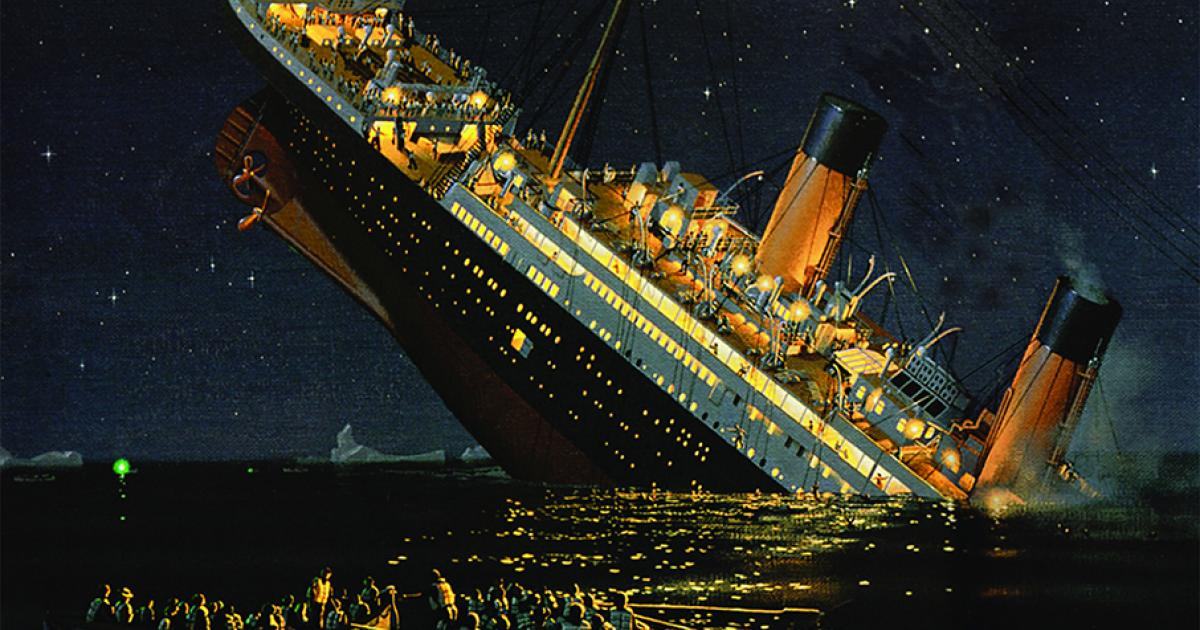

In [1]:
#********************
#IMPORT LIBRARIES
#********************
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
# Set visualization style
%matplotlib inline
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
np.random.seed(42)

<font size=5 color='cyan'> Data Overview and Initial Exploration

-------------------------

Before diving into preprocessing and modeling, it's crucial to get a good understanding of the dataset. This involves checking the basic information about the data, looking at the first few rows, examining the data types of each column, and getting a statistical summary.

The code below loads the dataset and displays its shape and the first few rows, giving us an initial glimpse into the data structure and content.

In [2]:
# Load the dataset
df = pd.read_csv('/content/Titanic-Dataset.csv')
print(f'The dataset is loaded with shape : {df.shape}')
print('The Initial Data Snapshot:')
df.head()

The dataset is loaded with shape : (891, 12)
The Initial Data Snapshot:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Column Names

It's helpful to list all the column names in the dataset to know what features are available for analysis and modeling. The following code prints out each column name.

In [3]:
# Columns in Dataset
for columns in df.columns:
  print(f'- {columns}')

- PassengerId
- Survived
- Pclass
- Name
- Sex
- Age
- SibSp
- Parch
- Ticket
- Fare
- Cabin
- Embarked


- Data Types

Understanding the data type of each attribute is important for knowing how to handle them during preprocessing. This code provides a summary of the column names, their non-null counts, and their data types (e.g., int64, float64, object).

In [4]:
# Data type of each attribute of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<font size=5 color='cyan'> Numeric Columns

----------------
Identifying the numerical columns is necessary for statistical analysis and certain preprocessing steps like scaling or correlation analysis. This code snippet filters and prints the names of columns with an integer data type.

In [5]:
# Numeric Columns in the dataframe
numeric_columns = df.select_dtypes(include='int64')
print('The Numeric columns in the dataframe : \n')
for column in numeric_columns:
  print('-', column)

The Numeric columns in the dataframe : 

- PassengerId
- Survived
- Pclass
- SibSp
- Parch


<font size=5 color='cyan'> Dataset Shape and Statistical Summary

--------------------
Getting the shape of the dataset (number of rows and columns) and a statistical summary provides a quick overview of the data's dimensions and basic statistics for numerical columns (like mean, standard deviation, min, max, etc.) and counts for categorical columns. The `describe(include='all')` function gives a comprehensive summary for all column types.

-<font color='steelblue'> Variable Description

- PassengerId : Unique identifier for each passenger
- Survived : Survival status (1 = survived, 0 = did not survive)
- Pclass : Ticket class (1st, 2nd, 3rd)
- Name : Passenger’s full name
- Sex : Gender of the passenger
- Age : Passenger’s age (in years)
- SibSp : Number of siblings/spouses aboard
- Parch : Number of parents/children aboard
- Ticket : Ticket number
- Fare : Ticket fare (in British pounds)
- Cabin : Cabin number/category
- Embarked : Port of embarkation

    C = Cherbourg

    Q = Queenstown

    S = Southampton

In [6]:
# Data Overview
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} Columns.')
print(f'The Statistical Details of the data : ')
df.describe(include='all')

The dataset contains 891 rows and 12 Columns.
The Statistical Details of the data : 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


<font size=5 color='cyan'> Exploratory Data Analysis (EDA)

--------------------
In this section, we perform exploratory data analysis to understand the characteristics of the dataset, identify patterns, and visualize relationships between features.

<font size=5 color='cyan'>  Missing Data Overview

------------------------
We first examine the extent of missing values in each column to understand which features require imputation or further handling.

In [7]:
# --- Exploratory Data Analysis (EDA) ---
# Overview of missing data
missing = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_percent], axis=1, keys=['Missing Count', 'Missing %'])
missing_df.style.background_gradient(cmap='Reds')

,Missing Count,Missing %
Cabin,687,77.100000
Age,177,19.870000
Embarked,2,0.220000
PassengerId,0,0.000000
Name,0,0.000000
Pclass,0,0.000000
Survived,0,0.000000
Sex,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


<font size=5 color='cyan'>  Visualizing Missing Data

----------------------
A heatmap provides a visual representation of the missing data, making it easier to identify columns with a high number of missing values. The colors indicate the presence (or absence) of data points.

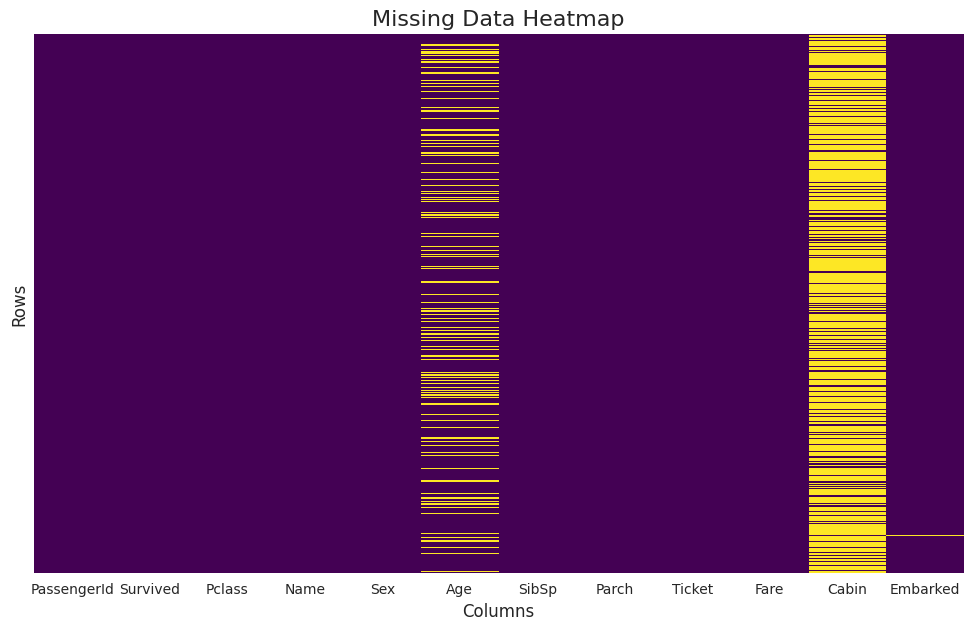

In [8]:
# Visualize missing data with heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Heatmap', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.show()


<font size=5 color='cyan'>  Target Variable Distribution

------------------
We visualize the distribution of the target variable 'Survived' using a countplot to see the proportion of passengers who survived versus those who did not. This helps us understand if the dataset is balanced or imbalanced with respect to the target variable.

In [9]:
# Target variable distribution
def bar_plot(variable):
  var = df[variable]

  # Count categories
  varValue = var.value_counts()

  # Plot
  plt.figure(figsize=(9, 3))
  plt.bar(varValue.index, varValue)
  plt.xticks(varValue.index, varValue.index.values)
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show()

  # Print counts
  print(f"{variable}: \n{varValue}")

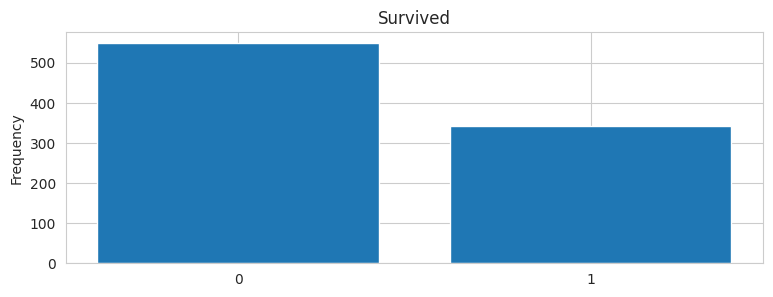

Survived: 
Survived
0    549
1    342
Name: count, dtype: int64


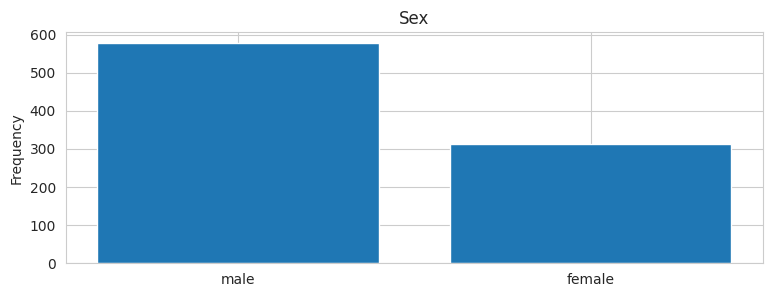

Sex: 
Sex
male      577
female    314
Name: count, dtype: int64


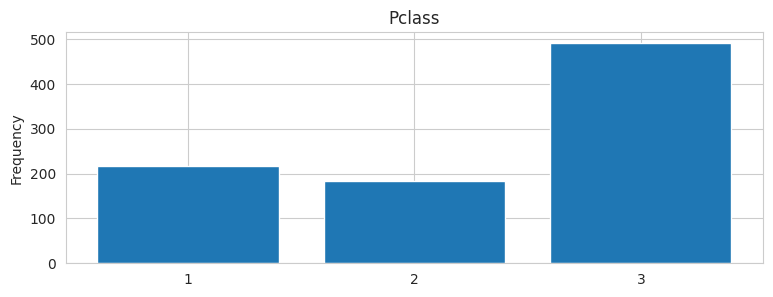

Pclass: 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


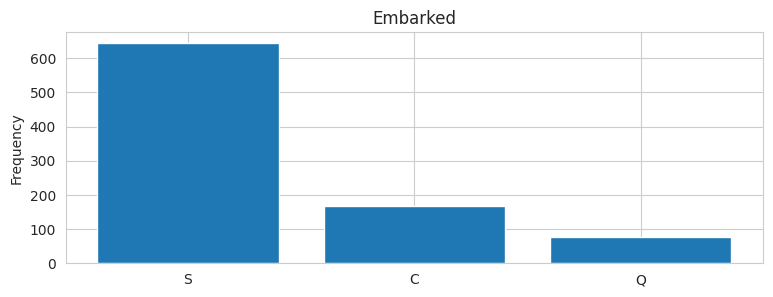

Embarked: 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


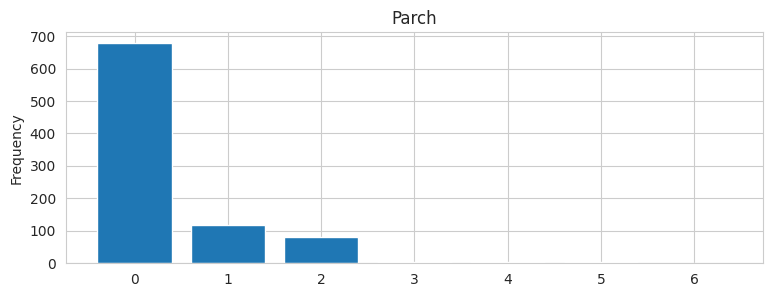

Parch: 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [10]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "Parch"]
for c in category1:
    bar_plot(c)

In [11]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print(f"{c} \n{df[c].value_counts()}\n")

Cabin 
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

Name 
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Ticket 
Ticket
347082              7
1601                7
CA. 2343            7
3

<font size=5 color='cyan'>  Age Distribution by Survival

--------------------------
We plot the distribution of 'Age' for both survived and non-survived passengers using kernel density estimation plots. This visualization helps us understand if there are different age patterns among those who survived and those who did not. We can observe if certain age groups had a higher or lower chance of survival.

In [12]:
# Age distribution by survival
def plot_hist(variable):

    plt.figure(figsize=(9, 3))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title(f"{variable} distribution (Histogram)")
    plt.show()


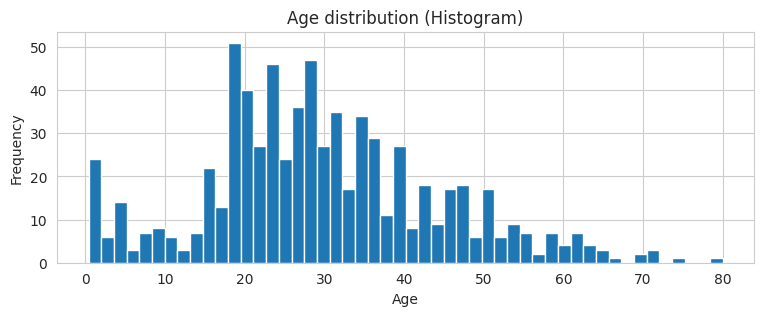

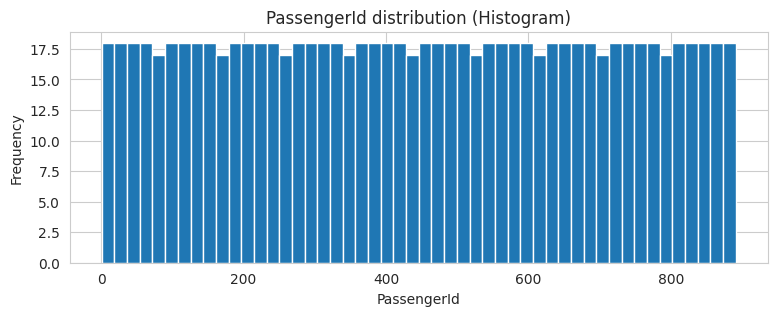

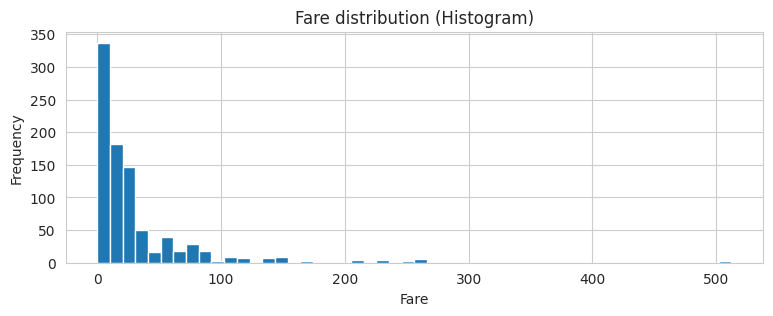

In [13]:
numeric_var = ["Age", "PassengerId", "Fare"]
for n in numeric_var:
    plot_hist(n)

<font size=5 color='cyan'>  Correlation Matrix

-------------------------
We generate a correlation matrix to visualize the linear relationships between the numerical features in the dataset. The heatmap shows the correlation coefficients between pairs of numerical columns. Values close to 1 or -1 indicate a strong positive or negative linear correlation, respectively, while values close to 0 indicate a weak correlation. This helps in identifying potential multicollinearity among features and understanding how individual features relate to the target variable 'Survived'.

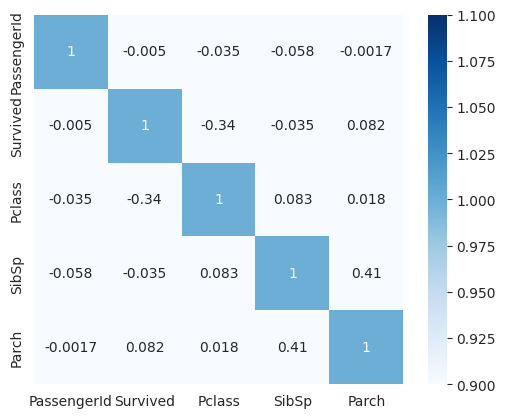

In [14]:
# Select only numeric columns for correlation matrix
corr = numeric_columns.corr()
sns.heatmap(corr,vmin = 1.0, vmax=1.0 , square=True, annot=True, cmap='Blues')
plt.show()

<font size=5 color='paleturquoise'>  Checking for Imbalance Data in the Target Variable (DATA ANALYSIS)</font>


Survived data with respective columns (Pclass, Sex,
SibSp, Parch )

In [15]:
features = ['Pclass', 'Sex', 'SibSp', 'Parch']

for feature in features:
    print(f"\n{feature} vs Survived")
    print(df[[feature, 'Survived']]
          .groupby(feature, as_index=False)
          .mean()
          .sort_values(by='Survived', ascending=False))



Pclass vs Survived
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Sex vs Survived
      Sex  Survived
0  female  0.742038
1    male  0.188908

SibSp vs Survived
   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

Parch vs Survived
   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


<font size=5 color=cyan> Outlier Detection

In [16]:
from collections import Counter # Import Counter

def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # Quartiles
        Q1 = np.percentile(df[c], 25)  # 1st quartile
        Q3 = np.percentile(df[c], 75)  # 3rd quartile
        IQR = Q3 - Q1                  # Interquartile range

        # Outlier step (1.5 * IQR rule)
        outlier_step = IQR * 1.5

        # Detect outliers for feature c
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index

        # Store indices
        outlier_indices.extend(outlier_list_col)

    # Count how many times each index occurs (across features)
    outlier_indices = Counter(outlier_indices)

    # Select indices flagged as outliers in more than 2 features
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

    return multiple_outliers

In [17]:
df.loc[detect_outliers(df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [18]:
# Drop Outliers
df = df.drop(detect_outliers(df,['Age','SibSp','Parch','Fare']),axis=0).reset_index(drop=True)

<font size=5 color='cyan'>  Data Preprocessing and Feature Engineering

--------------------
In this section, we will preprocess the data to prepare it for machine learning model training. This involves handling missing values, creating new informative features, encoding categorical variables, and scaling numerical features.

<font size=5 color='cyan'>  Handling Missing Values

-------------------
We identified that the 'Age', 'Fare', and 'Embarked' columns contain missing values. To address this, we will impute these missing values using appropriate strategies:

- **Age**: Imputed with the median age to handle missing numerical data without being heavily affected by outliers.
- **Fare**: Imputed with the mean fare.
- **Embarked**: Imputed with the mode (most frequent) value, as it is a categorical feature.

In [19]:
#total rows
len(df)

881

In [20]:
# Columns with missing values
df.columns[df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [21]:
# count missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,170
SibSp,0
Parch,0
Ticket,0
Fare,0


<font size=5 color=skyblue> Filling Missing Values

In [22]:
# where embarked is missing
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


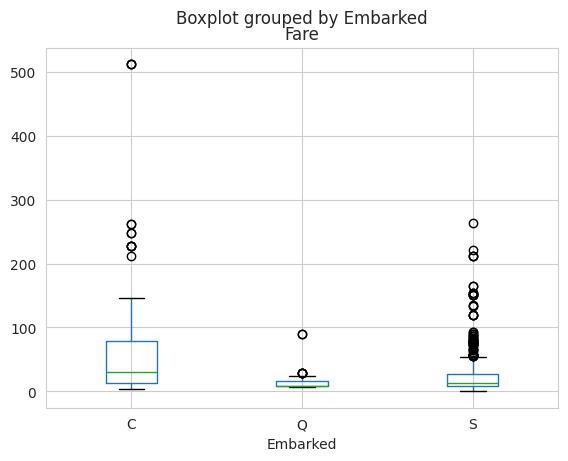

In [23]:
#Boxplot of "fare" grouped by 'Embarked'
df.boxplot(column='Fare' , by='Embarked')
plt.show()

In [24]:
df['Embarked'] = df['Embarked'].fillna('S') # Fill missing 'Embarked' values with 'S' (Southampton)

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
# Rows with "age" missing values
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [26]:
# 🎯 Overall median age
overall_median_age = df["Age"].median()

# Function to predict missing Age
def predict_age(row):
    if np.isnan(row["Age"]):
        group_median = df[
            (df["SibSp"] == row["SibSp"]) &
            (df["Parch"] == row["Parch"]) &
            (df["Pclass"] == row["Pclass"]) &
            (df["Age"].notnull())
        ]["Age"].median()

        return group_median if not np.isnan(group_median) else overall_median_age
    else:
        return row["Age"]

df["Age"] = df.apply(predict_age, axis=1)

In [27]:
df[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<font size=5 color=cyan> Exploratory Data Analysis

------------------------

# Survived Variables plotting

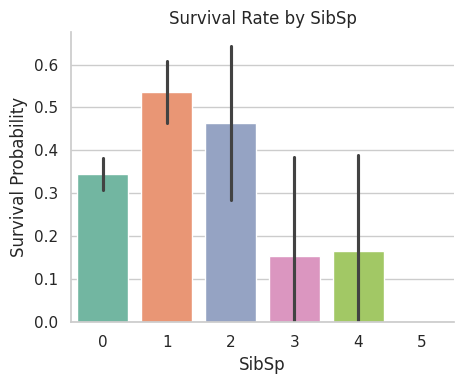

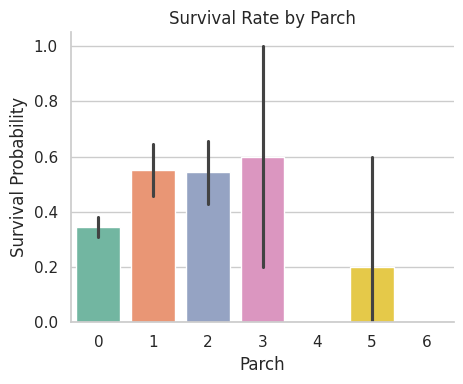

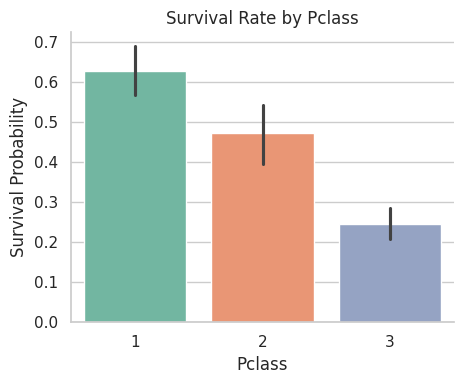

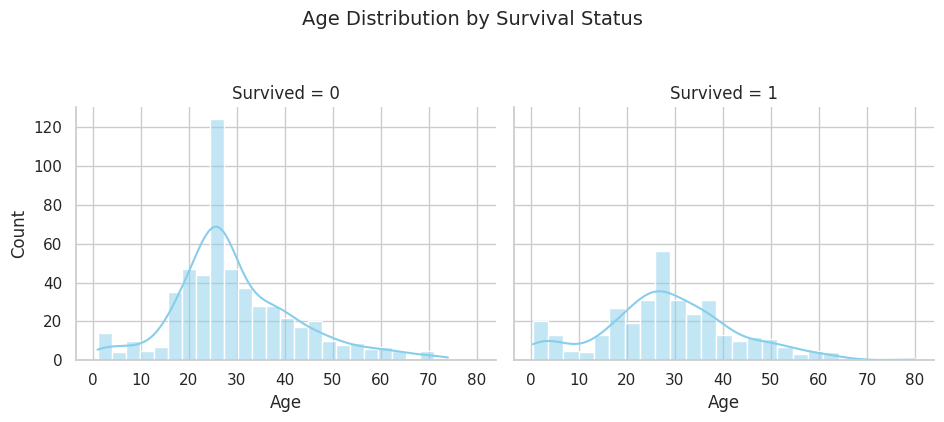

In [28]:
# Set a clean style
sns.set(style="whitegrid")

# 🎨 Custom palette for bar plots
palette = sns.color_palette("Set2")

# 📊 Survival probability by categorical features
for i, feature in enumerate(['SibSp', 'Parch', 'Pclass']):
    g = sns.catplot(
        x=feature, y="Survived", data=df,
        kind="bar", palette=palette, height=4, aspect=1.2
    )
    g.set_ylabels("Survival Probability")
    g.set_xlabels(f"{feature}")
    plt.title(f"Survival Rate by {feature}", fontsize=12)
    plt.tight_layout()
    plt.show()

# 🎂 Age distribution split by survival status
g = sns.FacetGrid(df, col="Survived", height=4, aspect=1.2)
g.map(sns.histplot, "Age", bins=25, kde=True, color="skyblue")
g.set_axis_labels("Age", "Count")
g.set_titles("Survived = {col_name}")
plt.suptitle("Age Distribution by Survival Status", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

Correlation between  SibSp — Parch — Age — Fare — Survived

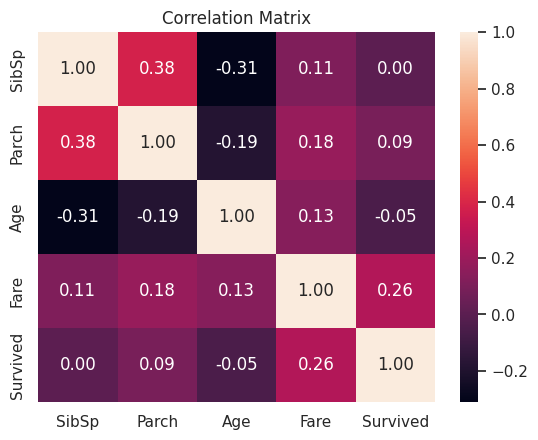

In [29]:
#heatmap
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]

sns.heatmap(df[list1].corr(), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

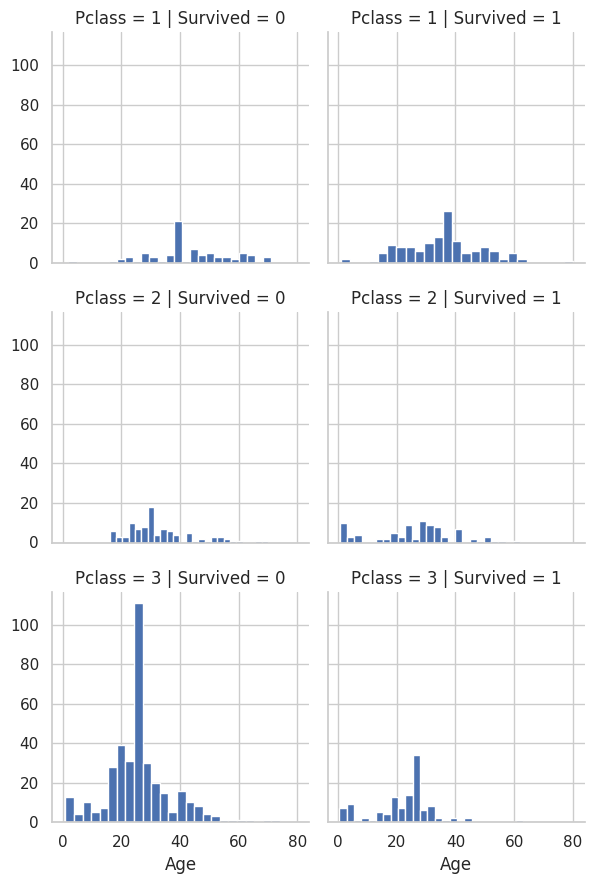

In [30]:
# Age distribution by class & survival
g = sns.FacetGrid(df, col="Survived", row="Pclass")
g.map(plt.hist, "Age", bins=25)
g.add_legend()
plt.show()

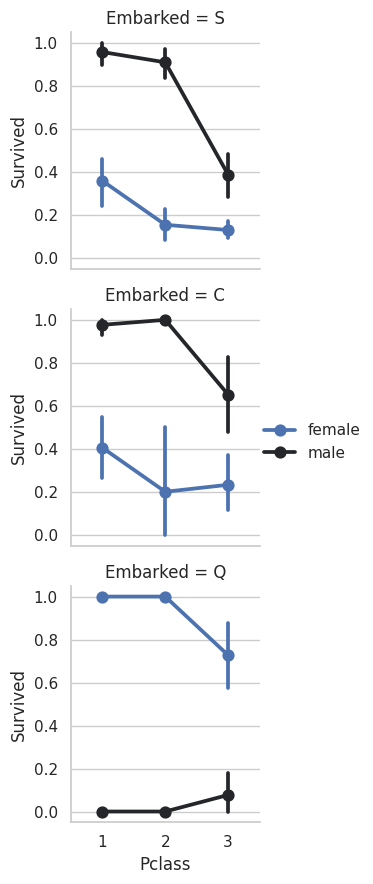

In [31]:
# Survival by Embarkation port
g = sns.FacetGrid(df, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

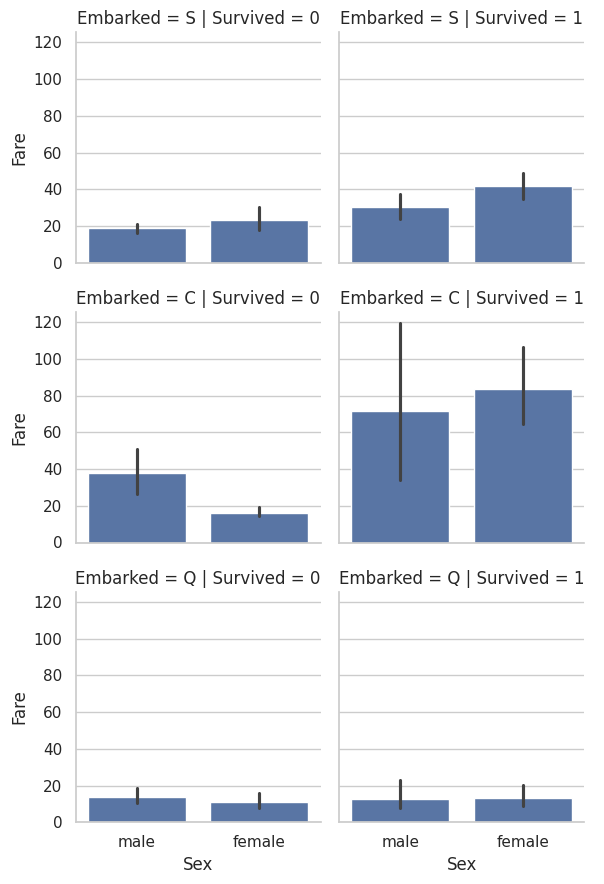

In [32]:
# Fare by Embarkation & Survival
g = sns.FacetGrid(df, row="Embarked", col="Survived")
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

<font size=5 color='cyan'>  Feature Engineering

------------------
We will create new features from existing ones to potentially capture more complex relationships in the data and improve model performance:

- **FamilySize**: Calculated as the sum of 'SibSp' (number of siblings/spouses aboard) and 'Parch' (number of parents/children aboard) plus one (for the passenger themselves). This represents the total number of family members.
- **IsAlone**: A binary feature indicating whether a passenger is traveling alone (FamilySize = 1) or with family.
- **Title**: Extracted from the 'Name' column, representing the passenger's title (e.g., Mr., Mrs., Miss, Master). Rare titles are grouped into a single 'Rare' category.
- **FarePerPerson**: Calculated by dividing the 'Fare' by the 'FamilySize'. This represents the cost of the ticket per family member.

# Familysize and Title

In [33]:
# Feature Engineering
# Create 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone'
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Extract 'Title' from 'Name'
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Replace rare titles with a common one
df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Create 'FarePerPerson'
df['FarePerPerson'] = df['Fare'] / df['FamilySize']

print("New features created:")
display(df[['FamilySize', 'IsAlone', 'Title', 'FarePerPerson']].head())

New features created:


,FamilySize,IsAlone,Title,FarePerPerson
0,2,0,Mr,3.62500
1,2,0,Mrs,35.64165
2,1,1,Miss,7.92500
3,2,0,Mrs,26.55000
4,1,1,Mr,8.05000


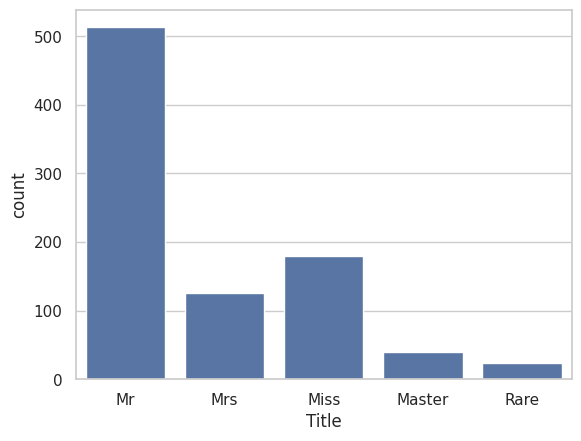

In [34]:
sns.countplot(x = "Title", data = df)
plt.show()

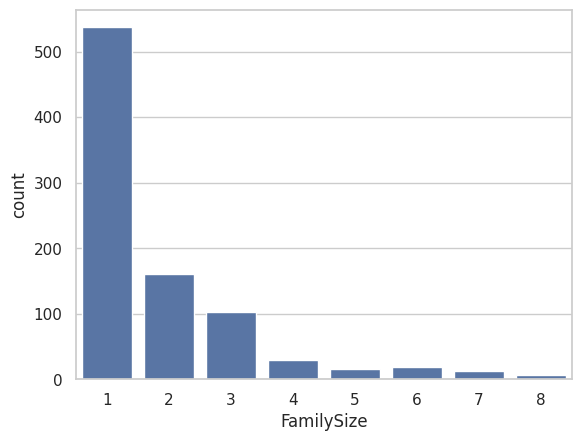

In [35]:
sns.countplot(x = "FamilySize", data = df)
plt.show()

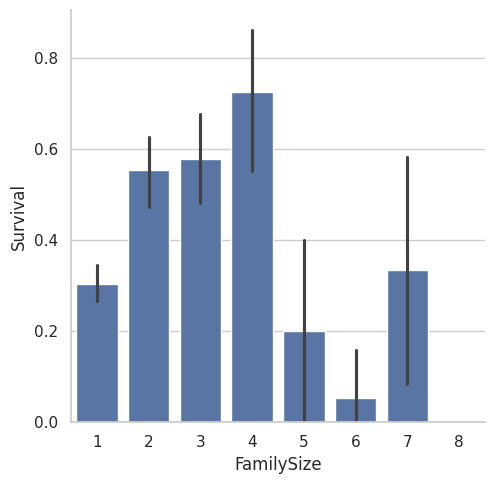

In [36]:
#Survival probability by Family Size
g = sns.catplot(x="FamilySize", y="Survived", data=df, kind="bar")
g.set_ylabels("Survival")
plt.show()

# Embarked

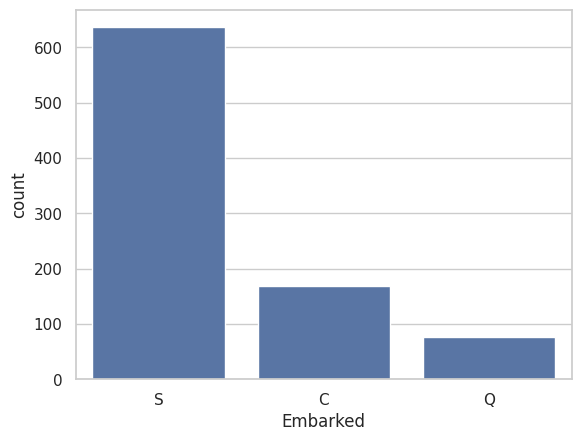

In [37]:
sns.countplot(x = "Embarked", data = df)
plt.show()

In [38]:
#One-hot encode 'Embarked' column
df = pd.get_dummies(data=df, columns=["Embarked"], dtype=int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Title,FarePerPerson,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,2,0,Mr,3.62500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,0,Mrs,35.64165,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,Miss,7.92500,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,2,0,Mrs,26.55000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,1,Mr,8.05000,0,0,1


# Ticket

In [39]:
df["Ticket"].head(25)

,Ticket
0,A/5 21171
1,PC 17599
2,STON/O2. 3101282
3,113803
4,373450
5,330877
6,17463
7,349909
8,347742
9,237736


In [40]:
#Extract ticket prefix (remove '.' and '/')
a = "A/5. 2151"
a.replace(".", "").replace("/", "").strip().split(" ")[0]

'A5'

In [41]:
# Store cleaned ticket prefixes
tickets = []
for i in list(df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/", "").strip().split(" ")[0])
    else:
        tickets.append("x")
df["Ticket"] = tickets

In [42]:
df["Ticket"].head(22)

,Ticket
0,A5
1,PC
2,STONO2
3,x
4,x
5,x
6,x
7,x
8,x
9,x


In [43]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,IsAlone,Title,FarePerPerson,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A5,7.2500,NaN,2,0,Mr,3.62500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C85,2,0,Mrs,35.64165,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STONO2,7.9250,NaN,1,1,Miss,7.92500,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,x,53.1000,C123,2,0,Mrs,26.55000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,x,8.0500,NaN,1,1,Mr,8.05000,0,0,1


In [44]:
# One-hot encode cleaned Ticket prefixes
df = pd.get_dummies(df, columns=["Ticket"], prefix="T", dtype=int)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,FamilySize,IsAlone,Title,FarePerPerson,Embarked_C,Embarked_Q,Embarked_S,T_A4,T_A5,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_PC,T_PP,T_PPP,T_SC,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,2,0,Mr,3.62500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,2,0,Mrs,35.64165,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,1,1,Miss,7.92500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,2,0,Mrs,26.55000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,1,1,Mr,8.05000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,6,0,3,"Moran, Mr. James",male,26.0,0,0,8.4583,NaN,1,1,Mr,8.45830,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,1,1,Mr,51.86250,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,5,0,Master,4.21500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,3,0,Mrs,3.71110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,2,0,Mrs,15.03540,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Pclass


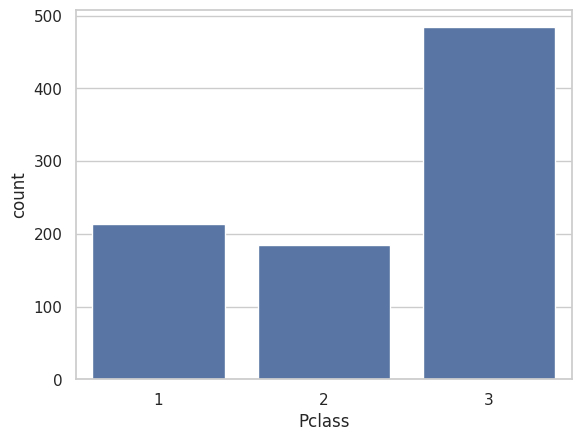

In [45]:
sns.countplot(x = "Pclass", data = df)
plt.show()

In [46]:
#Convert Pclass to categorical
df["Pclass"] = df["Pclass"].astype("category")

#One-hot encode Pclass
df = pd.get_dummies(df, columns=["Pclass"], dtype=int)
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,FamilySize,IsAlone,Title,FarePerPerson,Embarked_C,Embarked_Q,Embarked_S,T_A4,T_A5,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_PC,T_PP,T_PPP,T_SC,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,2,0,Mr,3.62500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,2,0,Mrs,35.64165,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,1,1,Miss,7.92500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,2,0,Mrs,26.55000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,1,1,Mr,8.05000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


# Sex

In [47]:
# Convert Sex to categorical
df["Sex"] = df["Sex"].astype("category")

# One-hot encode Sex
df = pd.get_dummies(df, columns=["Sex"], dtype=int)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Cabin,FamilySize,IsAlone,Title,FarePerPerson,Embarked_C,Embarked_Q,Embarked_S,T_A4,T_A5,T_AS,T_C,T_CA,T_CASOTON,T_FC,T_FCC,T_Fa,T_LINE,T_PC,T_PP,T_PPP,T_SC,T_SCA4,T_SCAH,T_SCOW,T_SCPARIS,T_SCParis,T_SOC,T_SOP,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,NaN,2,0,Mr,3.62500,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C85,2,0,Mrs,35.64165,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,NaN,1,1,Miss,7.92500,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,C123,2,0,Mrs,26.55000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,NaN,1,1,Mr,8.05000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


# Drop PassengerId and Cabin

In [48]:
df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       881 non-null    int64  
 1   Name           881 non-null    object 
 2   Age            881 non-null    float64
 3   SibSp          881 non-null    int64  
 4   Parch          881 non-null    int64  
 5   Fare           881 non-null    float64
 6   FamilySize     881 non-null    int64  
 7   IsAlone        881 non-null    int64  
 8   Title          881 non-null    object 
 9   FarePerPerson  881 non-null    float64
 10  Embarked_C     881 non-null    int64  
 11  Embarked_Q     881 non-null    int64  
 12  Embarked_S     881 non-null    int64  
 13  T_A4           881 non-null    int64  
 14  T_A5           881 non-null    int64  
 15  T_AS           881 non-null    int64  
 16  T_C            881 non-null    int64  
 17  T_CA           881 non-null    int64  
 18  T_CASOTON 

<font size=6 color=cyan> Modeling

----------------

In [57]:
# import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
sns.set(style="whitegrid")

# Train and Split Dataset

In [58]:
# Data Preparation for Modeling
# Drop non-predictive columns (e.g., Name and Title are text-based and not encoded)
df = df.drop(columns=['Name', 'Title'], errors='ignore')  # 'Title' might not be in your exact file; adjust if needed

# Features and target
X = df.drop(columns=['Survived'])
y = df['Survived']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (704, 46), Test shape: (177, 46)



Logistic Regression Results:
Accuracy: 0.7627
Precision: 0.7407
Recall: 0.5882
F1-Score: 0.6557
ROC-AUC: 0.8059


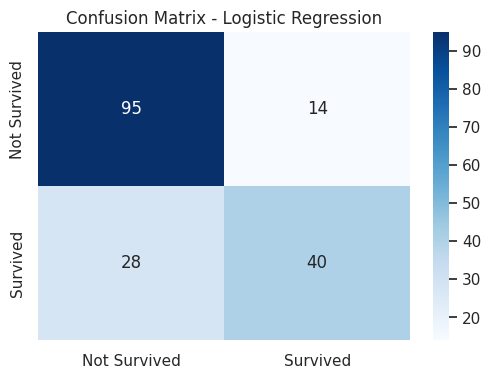


Random Forest Results:
Accuracy: 0.8023
Precision: 0.7895
Recall: 0.6618
F1-Score: 0.7200
ROC-AUC: 0.8247


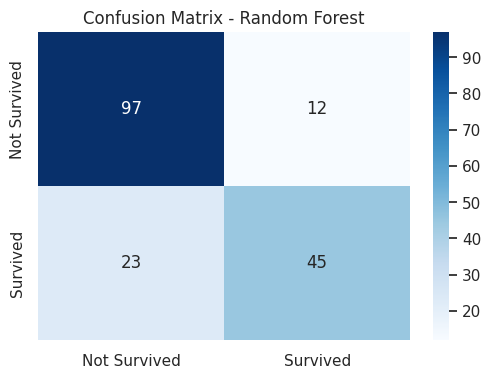


Gradient Boosting Results:
Accuracy: 0.8023
Precision: 0.8000
Recall: 0.6471
F1-Score: 0.7154
ROC-AUC: 0.8292


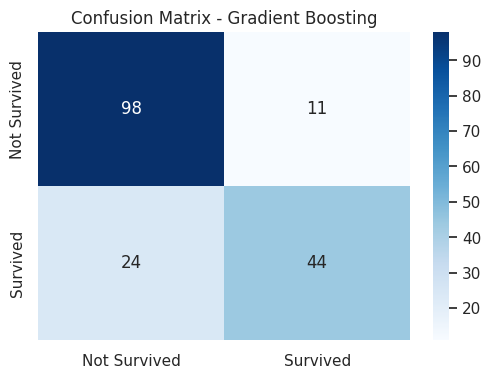


Random Forest Cross-Validation Accuracy: 0.8225 (+/- 0.1003)


In [59]:
# Model Selection and Training
# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else 'N/A'
    }

    print(f"\n{model_name} Results:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    return metrics

# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test, name)

# Cross-validation for Random Forest (to check stability)
rf_model = models['Random Forest']
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"\nRandom Forest Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

Best Random Forest Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 0.8439

Tuned Random Forest Results:
Accuracy: 0.7853
Precision: 0.8000
Recall: 0.5882
F1-Score: 0.6780
ROC-AUC: 0.8169


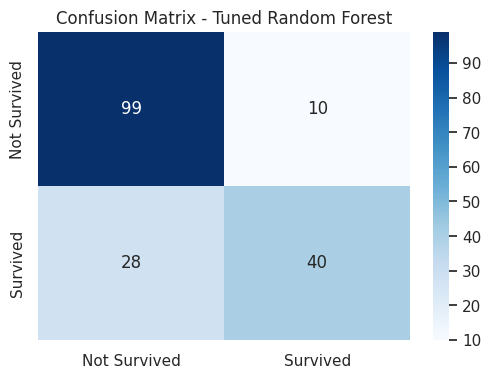

In [60]:
# Hyperparameter Tuning for Best Model
# Tune Random Forest (assuming it's the best based on initial results; adjust if another model performs better)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print(f"Best Random Forest Params: {grid_search.best_params_}")
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")

# Evaluate tuned model
tuned_results = evaluate_model(best_rf, X_train, X_test, y_train, y_test, "Tuned Random Forest")

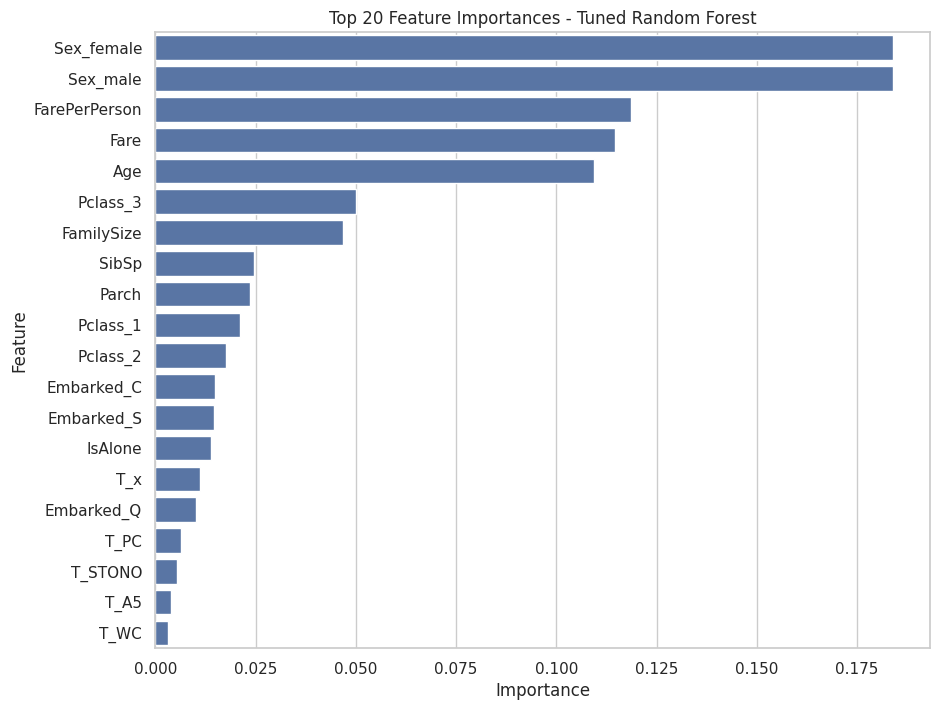

Top 10 Important Features:
          Feature  Importance
44     Sex_female    0.184041
45       Sex_male    0.183892
6   FarePerPerson    0.118699
3            Fare    0.114535
0             Age    0.109318
43       Pclass_3    0.050176
4      FamilySize    0.046830
1           SibSp    0.024537
2           Parch    0.023644
41       Pclass_1    0.021250


In [61]:
# Feature Importance and Interpretability
# For Random Forest, plot feature importance
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))  # Top 20 features
plt.title('Top 20 Feature Importances - Tuned Random Forest')
plt.show()

print("Top 10 Important Features:")
print(feature_importance_df.head(10))

This Jupyter notebook outlines a comprehensive data pipeline for the Titanic Survival Prediction task, covering key stages from data ingestion to model evaluation.

Here are the key steps of the data pipeline:

*   **Data Loading and Initial Exploration**: The dataset is loaded, its structure and missing values are examined, and basic statistics are reviewed.
*   **Exploratory Data Analysis (EDA)**: Data distributions, relationships between features, and outliers are visualized and analyzed. Outliers are subsequently removed.
*   **Data Preprocessing and Feature Engineering**:
    *   Missing values are handled through imputation (median for Age, mode for Embarked).
    *   New features like `FamilySize`, `IsAlone`, `Title`, and `FarePerPerson` are created.
    *   Categorical features ('Embarked', 'Ticket', 'Pclass', 'Sex') are one-hot encoded.
    *   Irrelevant columns ('PassengerId', 'Cabin') are dropped.
*   **Modeling**:
    *   The preprocessed data is split into training and testing sets.
    *   Several models (Logistic Regression, Random Forest, Gradient Boosting) are trained and evaluated using various metrics.
    *   Hyperparameter tuning is performed on the best-performing model (Random Forest).
    *   Feature importances from the tuned model are analyzed and visualized.

Overall, the notebook demonstrates a standard machine learning workflow with a strong emphasis on data preparation and feature engineering before model training and evaluation.